In [1]:
import altair as alt

# This is to enable visualization rendering inside the notebook,
# similar to the inline instruction from matplotlib.
alt.renderers.enable('notebook')

In [2]:
import pandas as pd
import json
import psycopg2

/Users/wanyukun/Documents/Dataviz/viz/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
host = "datavis.cauuh8vzeelb.us-east-1.rds.amazonaws.com"
database = "top5"
user = "teamwonder"
password = "visproject"

In [41]:
def getData(by,filter):
    host = "datavis.cauuh8vzeelb.us-east-1.rds.amazonaws.com"
    database = "top5"
    user = "teamwonder"
    password = "visproject"

    if by == 'year':
        by = "SUBSTRING(date, 1, 7)"
    
    qfilter = []
    for f in filter:
        if filter[f] == 'all':
            continue
        if f == "fromyear":
            qfilter.append("date > "+str(filter[f]))
            continue
        if f == "toyear":
            qfilter.append("date < "+str(filter[f]))
            continue
        qfilter.append(str(f)+' = '+str(filter[f]))

    if qfilter:
        querytext = ("SELECT " + by + ", COUNT(gid) FROM tabletop5 " +
                     "WHERE " + " AND ".join(qfilter) + " GROUP BY "+ by + " ORDER BY "+by+ ";")
    else:
        querytext = ("SELECT " + by + ", COUNT(gid) FROM tabletop5 " +
                     " GROUP BY "+ by + " ORDER BY "+by+";")
    print(querytext)
    
    con = psycopg2.connect(host=host, database=database, user=user, password=password)
    cur = con.cursor()
    cur.execute(querytext)
    rows = cur.fetchall()
    return rows

In [36]:
querytext = ("SELECT * FROM tabletop5 " +
                     " where complaint_ = 'Air Quality';")

In [37]:
con = psycopg2.connect(host=host, database=database, user=user, password=password)
cur = con.cursor()
cur.execute(querytext)
rows = cur.fetchall()

In [40]:
rows[0]

(2,
 1,
 'Air Quality',
 '10023',
 Decimal('40.776106560588481'),
 Decimal('-73.979744680840554'),
 '2016-03-05',
 '0101000020E6100000F8A80823B47E52C023F8B37557634440')

In [42]:
filter = {"incident_z":"'10001'","complaint_":"all","fromyear":"all","toyear":"'2018'"}

In [43]:
k = getData('year',filter)

SELECT SUBSTRING(date, 1, 7), COUNT(gid) FROM tabletop5 WHERE incident_z = '10001' AND date < '2018' GROUP BY SUBSTRING(date, 1, 7) ORDER BY SUBSTRING(date, 1, 7);


In [44]:
a = pd.DataFrame(k,columns=['year','count'])

In [45]:
a

,year,count
0,2013-01,58
1,2013-02,54
2,2013-03,74
3,2013-04,79
4,2013-05,83
5,2013-06,75
6,2013-07,75
7,2013-08,62
8,2013-09,81
9,2013-10,68


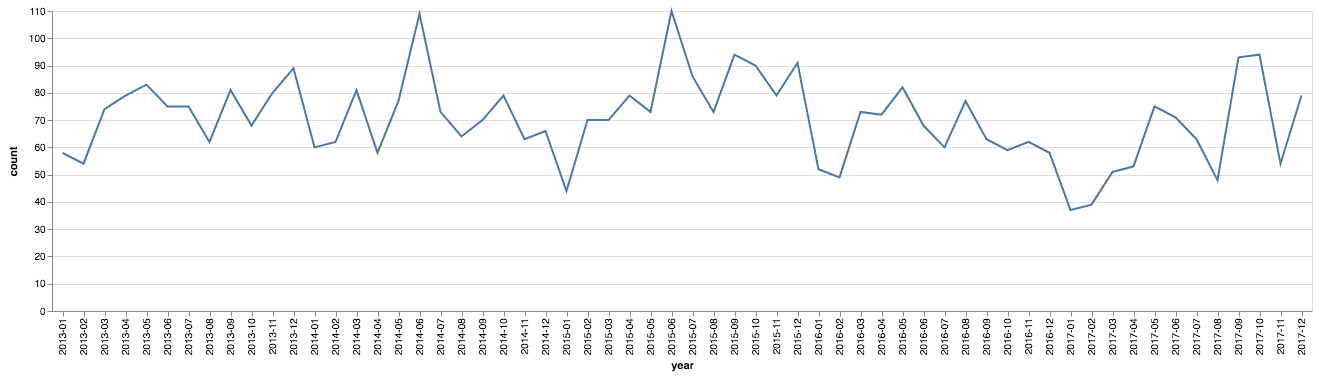

In [46]:
from vega_datasets import data

cars = data.cars()

line = alt.Chart(a).mark_line().encode(
    x='year',
    y='count'
)

# confidence_interval = alt.Chart(cars).mark_area(opacity=0.3).encode(
#     x='Year',
#     y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles/Gallon')),
#     y2='ci1(Miles_per_Gallon)'
# )

# confidence_interval + line
line

In [47]:
line.to_json()

'{\n  "$schema": "https://vega.github.io/schema/vega-lite/v2.3.0.json",\n  "config": {\n    "view": {\n      "height": 300,\n      "width": 400\n    }\n  },\n  "data": {\n    "values": [\n      {\n        "count": 58,\n        "year": "2013-01"\n      },\n      {\n        "count": 54,\n        "year": "2013-02"\n      },\n      {\n        "count": 74,\n        "year": "2013-03"\n      },\n      {\n        "count": 79,\n        "year": "2013-04"\n      },\n      {\n        "count": 83,\n        "year": "2013-05"\n      },\n      {\n        "count": 75,\n        "year": "2013-06"\n      },\n      {\n        "count": 75,\n        "year": "2013-07"\n      },\n      {\n        "count": 62,\n        "year": "2013-08"\n      },\n      {\n        "count": 81,\n        "year": "2013-09"\n      },\n      {\n        "count": 68,\n        "year": "2013-10"\n      },\n      {\n        "count": 80,\n        "year": "2013-11"\n      },\n      {\n        "count": 89,\n        "year": "2013-12"\n      